In [1]:
import qiskit


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit

In [4]:
import os

In [5]:
import sys

In [6]:
sys.path.append(os.path.join(os.path.dirname(__file__),'qiskit'))

NameError: name '__file__' is not defined

In [ ]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install qiskit-ibmq-provider

In [ ]:
import qiskit

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('75694dc5dfcbc609ca7b9e35b9dccd386f77ad6c25d70d806694b1cbaa89304547bcb49e84d6fb0902b2adb8651075569565c21990248607f5c9d5c5debd06b5')


MissingOptionalLibraryError: "The 'qiskit-ibmq-provider' library is required to use 'IBMQ provider'. You can install it with 'pip install qiskit-ibmq-provider'."

In [ ]:
import sys

In [ ]:
sys.path

['c:\\Users\\Tim\\Desktop\\qiskit',
 'c:\\Users\\Tim\\.conda\\envs\\main\\python38.zip',
 'c:\\Users\\Tim\\.conda\\envs\\main\\DLLs',
 'c:\\Users\\Tim\\.conda\\envs\\main\\lib',
 'c:\\Users\\Tim\\.conda\\envs\\main',
 '',
 'C:\\Users\\Tim\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'c:\\Users\\Tim\\.conda\\envs\\main\\lib\\site-packages',
 'c:\\Users\\Tim\\.conda\\envs\\main\\lib\\site-packages\\win32',
 'c:\\Users\\Tim\\.conda\\envs\\main\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\Tim\\.conda\\envs\\main\\lib\\site-packages\\Pythonwin']

In [ ]:
import qiskit.providers 

In [ ]:
from qiskit.providers

SyntaxError: invalid syntax (1246821070.py, line 1)

In [ ]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend)

MissingOptionalLibraryError: "The 'qiskit-ibmq-provider' library is required to use 'IBMQ provider'. You can install it with 'pip install qiskit-ibmq-provider'."

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout
from qiskit_aer import AerSimulator
from qiskit import Aer, transpile
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

In [ ]:
from qiskit_aer.noise import thermal_relaxation_error

In [ ]:
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [ ]:
error_u1=thermal_relaxation_error(t1 = 10, t2=10, time=1)

In [ ]:
noise_model = NoiseModel.from_backend(FakePerth(), thermal_relaxation=True, gate_error=True, readout_error=False)
#noise_model = NoiseModel()
#noise_model.add_quantum_error(error_u1,'',[0])

In [ ]:
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

In [ ]:

#device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)
simulator = Aer.get_backend('aer_simulator')



In [ ]:
count_ratio=[]
for t in range(1,300,10):
    t=t/10**6
    circ=QuantumCircuit(1,1)
    circ.sx(0)
    circ.barrier(0)
    circ.delay(t, unit='s')
 #   circ.rz(math.pi*t*10**5,0)
    circ.barrier(0)
    circ.sx(0)
    circ.barrier(0)
    circ.measure(0, 0)
    circ = transpile(circ, simulator)
    result_noise = backend.run(circ).result()
    counts_noise = result_noise.get_counts(0)
    one=counts_noise['1']
    #zero=counts_noise['0']
    count_ratio.append(one)

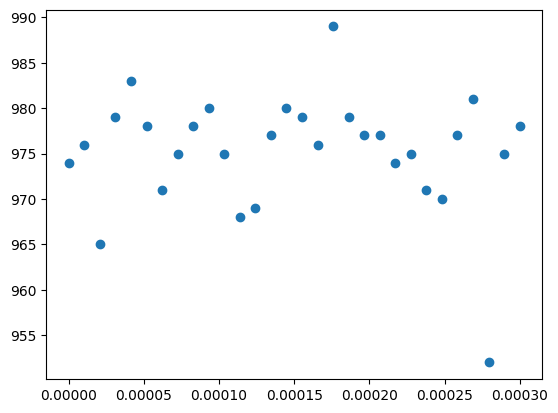

In [ ]:
x=np.linspace(0,300*10**-6,30)
plt.scatter(x,count_ratio)
plt.show()

In [ ]:


circ=QuantumCircuit(1,1)
circ.rx(math.pi/2,0)

circ.barrier(0)
circ.delay(1, unit='s')
circ.barrier(0)
circ.x(0)
circ.barrier(0)
circ.delay(1, unit='s')
circ.barrier(0)
circ.rx(math.pi/2,0)
circ.barrier(0)
circ.measure(0, 0)
circ = transpile(circ, simulator)
result_noise = sim_vigo.run(circ).result()
counts_noise = result_noise.get_counts(0)
count_ratio.append(counts_noise['1'])
'''/(counts_noise['1']+counts_noise['0'])'''

KeyError: '1'

C:\Users\Tim\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


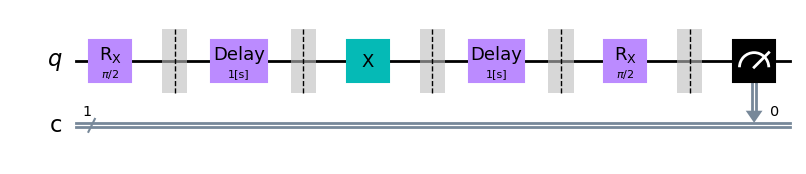

In [ ]:
circ.draw(output='mpl')

In [ ]:

count_ratio=[]
for t in range(1,300,10):
    t=t/10**6
    circ=QuantumCircuit(1,1)
    circ.rx(math.pi/2,0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    #circ.rz(math.pi/5,0)
    circ.x(0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    circ.rx(math.pi/2,0)
    circ.barrier(0)
    circ.measure(0, 0)
    circ = transpile(circ, simulator)
    result_noise = sim_vigo.run(circ).result()
    counts_noise = result_noise.get_counts(0)
    print(counts_noise)
    try:
        one=counts_noise['1']
    except:
        one=0
    try:
        zero=counts_noise['0']
    except:
        zero=0
    count_ratio.append((zero)/(one+zero))

{'0': 1017, '1': 7}
{'0': 923, '1': 101}
{'0': 829, '1': 195}
{'0': 781, '1': 243}
{'1': 299, '0': 725}
{'0': 662, '1': 362}
{'1': 354, '0': 670}
{'0': 632, '1': 392}
{'1': 417, '0': 607}
{'0': 610, '1': 414}
{'0': 568, '1': 456}
{'1': 477, '0': 547}
{'1': 469, '0': 555}
{'1': 489, '0': 535}
{'0': 581, '1': 443}
{'0': 539, '1': 485}
{'1': 517, '0': 507}
{'1': 477, '0': 547}
{'1': 502, '0': 522}
{'0': 534, '1': 490}
{'0': 520, '1': 504}
{'1': 477, '0': 547}
{'1': 536, '0': 488}
{'0': 520, '1': 504}
{'1': 522, '0': 502}
{'0': 541, '1': 483}
{'1': 507, '0': 517}
{'0': 527, '1': 497}
{'0': 527, '1': 497}
{'0': 526, '1': 498}


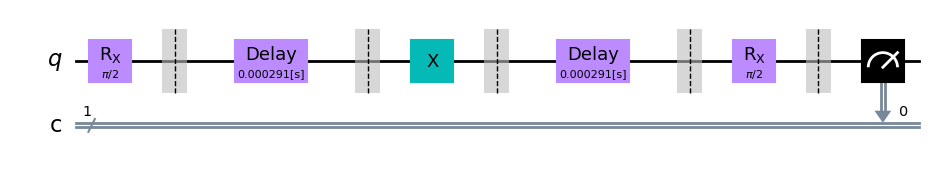

In [ ]:
circ.draw(output='mpl')

In [ ]:
def T2(t, A, T1,B):
    return A*np.exp(-t/T1)+B
popt, pcov = curve_fit(T2, x, count_ratio,p0=[1,10**-4,0], maxfev=5000)

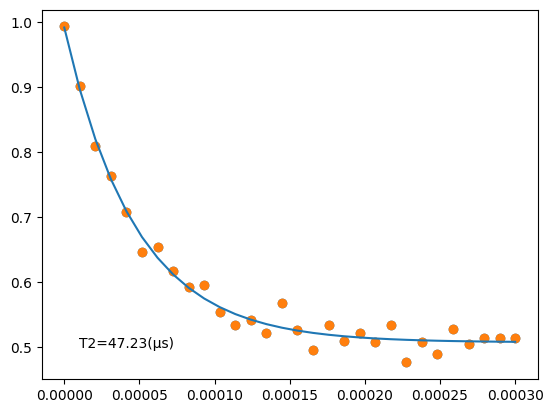

In [ ]:
x=np.linspace(0,300*10**-6,30)
yfit = T2(x,popt[0], popt[1],popt[2])

plt.plot(x,yfit)
plt.scatter(x,count_ratio)
plt.scatter(x,count_ratio)
plt.text(0.00001,0.5,'T2='+str(round(popt[1]*10**6,2))+'(μs)')
plt.show()